## KNN 

Зависимость KNN классификатора от масштабирования данных

In [2]:
# импорты библиотек

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

# настройка размеров графиков
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# прочитаю и посмотрю на данные

data = pd.read_csv('data/winedata.csv', sep=',', names=list(range(14)))
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X = data.drop(0, axis=1).values
y = data[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print('Accuracy of KNN classifier is {}'.format(accuracy_score(y_test, preds)))

Accuracy of KNN classifier is 0.6481481481481481


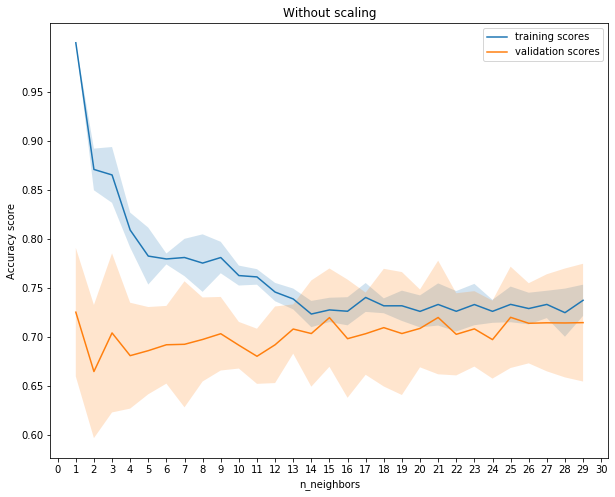

In [5]:
# построю кривую обучения

def plot_with_err(x, data, **kwargs):
    """
    Строит кривые валидации
    """
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)
    
    
n_neighbors = np.arange(1, 30)
val_train, val_test = validation_curve(KNeighborsClassifier(), X, y,
                                       'n_neighbors', n_neighbors, cv=5,
                                        scoring='accuracy')

plot_with_err(n_neighbors, val_train, label='training scores')
plot_with_err(n_neighbors, val_test, label='validation scores')
plt.title('Without scaling')
plt.xlabel('n_neighbors'); plt.ylabel('Accuracy score')
plt.xticks(n_neighbors)
plt.yticks(np.arange(0.6, 1, 0.05))
plt.xticks(np.arange(0, 31))
plt.legend();

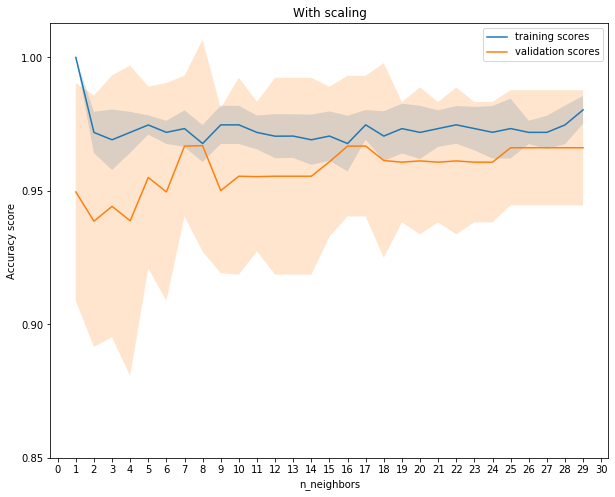

In [6]:
# попробую тоже самое с масштабированными признаками

X_scaled = scale(X)

# построю кривую обучения

def plot_with_err(x, data, **kwargs):
    """
    Строит кривые валидации
    """
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)
    
    
n_neighbors = np.arange(1, 30)
val_train, val_test = validation_curve(KNeighborsClassifier(), X_scaled, y,
                                       'n_neighbors', n_neighbors, cv=5,
                                        scoring='accuracy')

plot_with_err(n_neighbors, val_train, label='training scores')
plot_with_err(n_neighbors, val_test, label='validation scores')
plt.title('With scaling')
plt.xlabel('n_neighbors'); plt.ylabel('Accuracy score')
plt.xticks(n_neighbors)
plt.yticks(np.arange(0.85, 1, 0.05))
plt.xticks(np.arange(0, 31))
plt.legend();